In [1]:
import numpy
import pandas as pd
from ggplot import *
import matplotlib  
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [6]:
#data = pd.read_csv('yellow_tripdata_2016-01.csv')
data = pd.read_csv('../data/sample.csv')

In [4]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2998382,2,2016-01-12 19:27:38,2016-01-12 19:43:51,1,6.64,-74.007950,40.711922,1,N,-73.957642,40.770866,1,21.0,1.0,0.5,4.56,0.0,0.3,27.36
1,6632363,1,2016-01-19 09:09:01,2016-01-19 09:17:52,1,1.20,-73.991432,40.731956,1,N,-73.992203,40.743526,1,7.5,0.0,0.5,1.65,0.0,0.3,9.95
2,1643595,1,2016-01-08 09:43:19,2016-01-08 09:51:44,1,1.30,-73.978226,40.752174,1,N,-74.000412,40.761818,1,7.5,0.0,0.5,2.05,0.0,0.3,10.35
3,1425221,1,2016-01-06 23:42:08,2016-01-07 00:02:41,1,7.10,-73.976158,40.760414,5,N,-74.034958,40.712952,1,60.0,0.0,0.0,9.20,10.5,0.3,80.00
4,10491137,2,2016-01-09 02:19:36,2016-01-09 02:29:24,1,2.85,-73.983788,40.743210,1,N,-74.005760,40.708172,2,10.5,0.5,0.5,0.00,0.0,0.3,11.80


In [5]:
data.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [6]:
data.isnull().sum(axis=0)

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
data["pickup_day"] = pd.to_numeric(data["tpep_pickup_datetime"].str.slice(8, 10))
data["pickup_hour"] = pd.to_numeric(data["tpep_pickup_datetime"].str.slice(11, 13))
data["pick_format"] = pd.to_datetime(data["tpep_pickup_datetime"])
data["dropoff_format"] = pd.to_datetime(data["tpep_dropoff_datetime"])
data["trip_time"] = (data.dropoff_format-data.pick_format).astype('timedelta64[s]')/3600
data['average_speed'] = data['trip_distance']/data['trip_time']
data['cost_per_mile'] = data['fare_amount']/data['trip_distance']
data.loc[data['pickup_day'] % 7 == 1, 'week_day'] = 'Fri'
data.loc[data['pickup_day'] % 7 == 2, 'week_day'] = 'Sat'
data.loc[data['pickup_day'] % 7 == 3, 'week_day'] = 'Sun'
data.loc[data['pickup_day'] % 7 == 4, 'week_day'] = 'Mon'
data.loc[data['pickup_day'] % 7 == 5, 'week_day'] = 'Tue'
data.loc[data['pickup_day'] % 7 == 6, 'week_day'] = 'Wed'
data.loc[data['pickup_day'] % 7 == 0, 'week_day'] = 'Thu'

In [8]:
replacements = {
   'payment_type': {
      1: 'Credit Card',
      2: 'Cash',
      3: 'No charge',
      4: 'Dispute'},
    'VendorID': {
      1: 'Creative Mobile Technologies',
      2: 'VeriFone Inc.'},
    'RatecodeID': {
      1: 'Standard rate',
      2: 'JFK',
      3: 'Newark',
      4: 'Nassau or Westchester',
      5: 'Negotiated fare',
      6: 'Group ride',
      99: 'NA'}
}

data.replace(replacements, inplace=True)

In [9]:
data_clean = data.loc[(data['trip_distance'] > 0) & (data['trip_distance'] <= 15.6)]
data_clean = data_clean.loc[(data_clean['trip_time'] > 0) & (data_clean['trip_time'] <= 0.9)]
data_clean = data_clean.loc[(data_clean['total_amount'] >= 0) & (data_clean['total_amount'] <= 70)]
data_clean = data_clean.loc[(data_clean['fare_amount'] >= 0) & (data_clean['fare_amount'] <= 52)]
data_clean = data_clean.loc[(data_clean['tip_amount'] >= 0) & (data_clean['tip_amount'] <= 11.67)]
data_clean = data_clean.loc[(data_clean['pickup_longitude'] >= -75.0) & (data_clean['pickup_longitude'] < -72)]
data_clean = data_clean.loc[(data_clean['pickup_latitude'] >= 39.0) & (data_clean['pickup_latitude'] <= 43.0)]
data_clean = data_clean.loc[(data_clean['average_speed'] > 0) & (data_clean['average_speed'] <= 100.0)]
data_clean = data_clean.loc[(data_clean['cost_per_mile'] > 0) & (data_clean['cost_per_mile'] <= 15.0)]

In [10]:
data_clean.describe(percentiles=[.01, .25, .5, .75, .99])

,Unnamed: 0,passenger_count,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_day,pickup_hour,trip_time,average_speed,cost_per_mile
count,5.120870e+05,512087.00000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000
mean,5.459222e+06,1.67163,2.467594,-73.976579,40.752689,-73.956899,40.743126,11.146857,0.320568,0.499790,1.558978,0.162216,0.299997,13.988406,15.971476,13.547852,0.204489,11.742369,5.736235
std,3.154056e+06,1.32627,2.405227,0.029328,0.024611,1.151395,0.634792,7.105062,0.366401,0.010243,1.760597,0.946676,0.000937,8.709982,8.886497,6.404045,0.135084,5.633896,2.032286
min,1.700000e+01,0.00000,0.030000,-74.518303,40.408421,-74.522369,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,1.000000,0.000000,0.003333,0.278351,0.000758
1%,1.067263e+05,1.00000,0.350000,-74.013931,40.678676,-74.014214,40.667686,3.500000,0.000000,0.500000,0.000000,0.000000,0.300000,4.800000,1.000000,0.000000,0.030556,3.679343,2.888446
25%,2.716004e+06,1.00000,1.000000,-73.991837,40.738548,-73.991234,40.737167,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000,8.000000,9.000000,0.105556,7.954442,4.281346
50%,5.467721e+06,1.00000,1.620000,-73.981995,40.754890,-73.979843,40.755081,9.000000,0.000000,0.500000,1.260000,0.000000,0.300000,11.300000,16.000000,14.000000,0.171111,10.525799,5.357143
75%,8.191024e+06,2.00000,2.900000,-73.968246,40.768612,-73.963615,40.770260,13.500000,0.500000,0.500000,2.250000,0.000000,0.300000,16.300000,23.000000,19.000000,0.268889,14.064777,6.704981
99%,1.079744e+07,6.00000,11.900000,-73.862892,40.805111,-73.862045,40.830330,37.000000,1.000000,0.500000,8.200000,5.540000,0.300000,47.790000,31.000000,23.000000,0.661944,31.524324,12.500000
max,1.090685e+07,7.00000,15.600000,-73.512909,40.908493,0.000000,44.177277,52.000000,2.500000,0.500000,11.660000,44.120000,0.300000,70.000000,31.000000,23.000000,0.900000,98.456693,15.000000


### GEDA Univariado

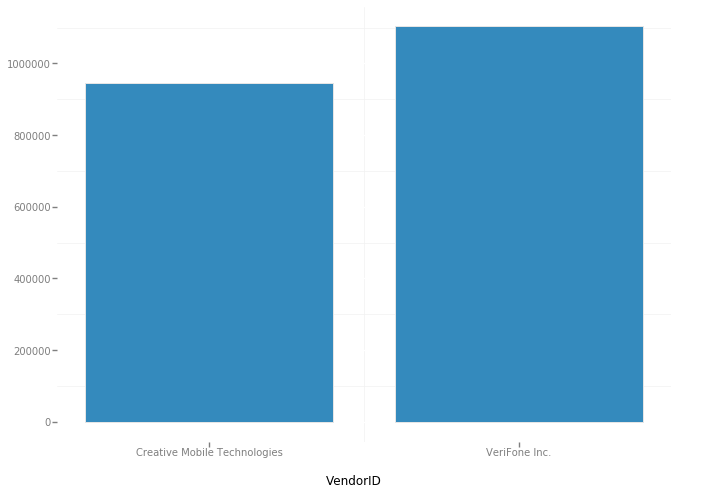

<ggplot: (-9223363298384672466)>

In [12]:
ggplot(aes(x='VendorID'), data=data_clean) + geom_bar() + theme_bw()

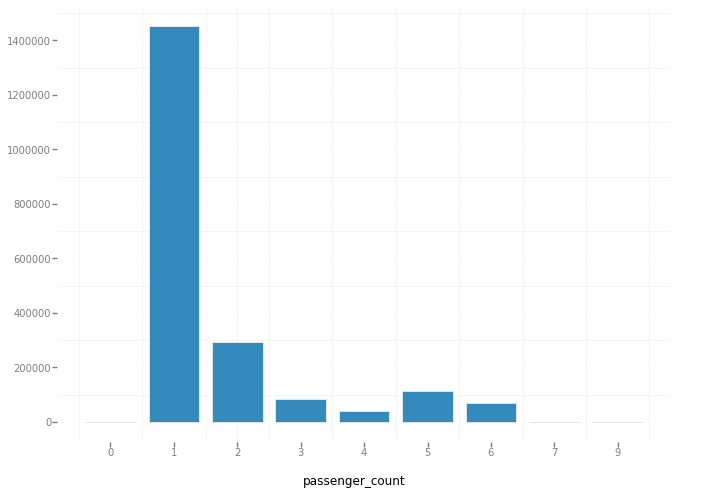

<ggplot: (8738447406926)>

In [13]:
ggplot(aes(x='passenger_count'), data=data_clean) + geom_bar() + theme_bw()

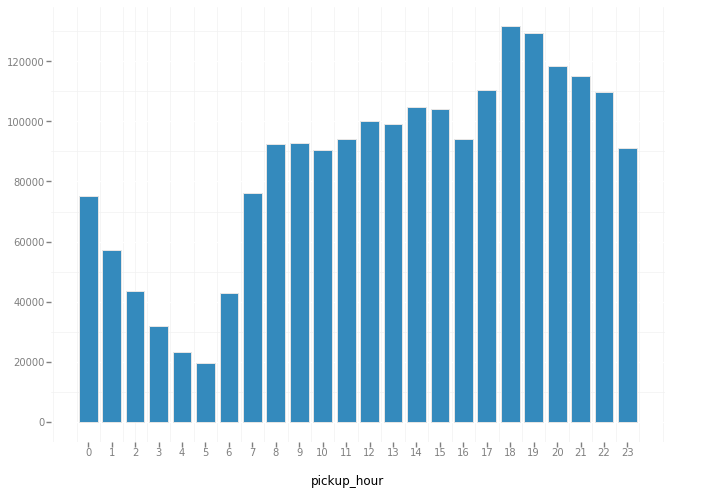

<ggplot: (8738447380144)>

In [14]:
ggplot(aes(x='pickup_hour'), data=data_clean) + geom_bar() + theme_bw()

In [ ]:
ggplot(aes(x='week_day'), data=data_clean) + geom_bar() + theme_bw()

In [ ]:
ggplot(aes(x='RatecodeID'), data=data_clean) + geom_bar() + theme_bw()

In [ ]:
ggplot(aes(x='payment_type'), data=data_clean) + geom_bar() + theme_bw()

In [ ]:
ggplot(aes(x='trip_distance'), data=data_clean) + geom_histogram(binwidth=1) + theme_bw()

In [ ]:
ggplot(aes(x='trip_time'), data=data_clean) + geom_histogram(binwidth=1.0/(0.9*60.0)) + theme_bw()

In [ ]:
ggplot(aes(x='total_amount'), data=data_clean) + geom_histogram(binwidth=1) + theme_bw()

In [ ]:
ggplot(aes(x='fare_amount'), data=data_clean) + geom_histogram(binwidth=1) + theme_bw()

In [ ]:
ggplot(aes(x='tip_amount'), data=data_clean) + geom_histogram(binwidth=0.5) + theme_bw()

In [ ]:
ggplot(aes(x='cost_per_mile'), data=data_clean) + geom_histogram(binwidth=0.5) + theme_bw()

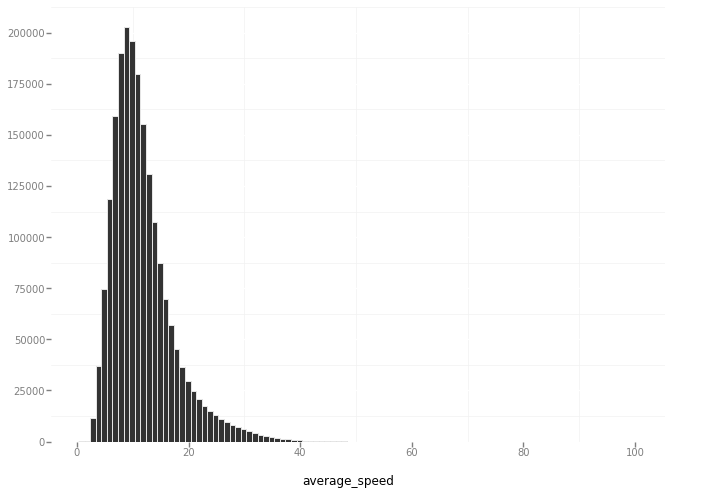

<ggplot: (8738447348975)>

In [15]:
ggplot(aes(x='average_speed'), data=data_clean) + geom_histogram(binwidth=1) + theme_bw()

### GEDA Bivariado

In [ ]:
ggplot(aes(x ='trip_distance', y = 'trip_time'), data = data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='trip_time', y = 'fare_amount'), data = data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='trip_distance', y = 'fare_amount'), data =data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='average_speed', y = 'fare_amount'), data =data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='fare_amount', y = 'tip_amount'), data =data_clean.loc[data_clean['payment_type'] == 'Credit Card']) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='fare_amount', y = 'total_amount'), data =data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='trip_distance', y = 'tip_amount'), data =data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='average_speed', y = 'tip_amount'), data =data_clean) + geom_point() + theme_bw()

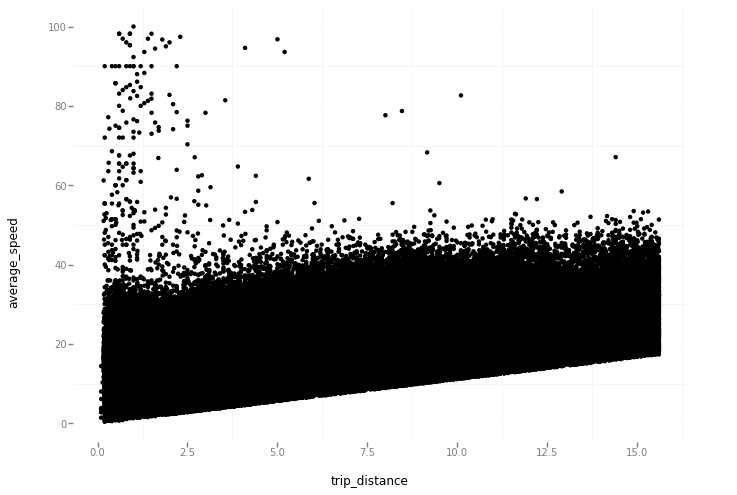

<ggplot: (-9223363298407643455)>

In [16]:
ggplot(aes(x ='trip_distance', y = 'average_speed'), data =data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='average_speed', y = 'cost_per_mile'), data =data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='pickup_latitude', y = 'pickup_longitude'), data =data_clean) + geom_point() + theme_bw()

In [ ]:
ggplot(aes(x ='payment_type', y = 'total_amount'), data =data_clean) + geom_boxplot() + theme_bw()

In [ ]:
ggplot(aes(x ='payment_type', y = 'fare_amount'), data =data_clean) + geom_boxplot() + theme_bw()

In [ ]:
ggplot(aes(x ='VendorID', y = 'fare_amount'), data =data_clean) + geom_boxplot() + theme_bw()

In [ ]:
ggplot(aes(x ='VendorID', y = 'trip_distance'), data =data_clean) + geom_boxplot() + theme_bw()

In [ ]:
ggplot(aes(x ='passenger_count', y = 'trip_distance'), data =data_clean) + geom_boxplot() + theme_bw()

In [ ]:
ggplot(aes(x ='passenger_count', y = 'total_amount'), data =data_clean) + geom_boxplot() + theme_bw()

In [ ]:
ggplot(aes(x ='passenger_count', y = 'fare_amount'), data =data_clean) + geom_boxplot() + theme_bw()

In [ ]:
ggplot(aes(x ='RatecodeID', y = 'total_amount'), data =data_clean) + geom_boxplot() + theme_bw()

In [ ]:
ggplot(aes(x ='RatecodeID', y = 'trip_distance'), data =data_clean) + geom_boxplot() + theme_bw()

### Otros analisis

In [ ]:
means = data_clean[['pickup_hour','average_speed']].groupby(['pickup_hour']).mean().reset_index()
ggplot(aes(x ='pickup_hour', weight = 'average_speed'), data = means) + geom_bar() + theme_bw()

In [ ]:
means = data_clean[['average_speed','week_day']].groupby(['week_day']).mean().reset_index()
ggplot(aes(x ='week_day', weight = 'average_speed'), data = means) + geom_bar() + theme_bw()

In [ ]:
means = data_clean[['pickup_hour','week_day','average_speed']].groupby(['pickup_hour','week_day']).mean().reset_index()
ggplot(aes(x ='pickup_hour', weight = 'average_speed'), data = means) + geom_bar() + theme_bw() + facet_grid('week_day')

In [ ]:
means = data_clean[['pickup_hour','cost_per_mile']].groupby(['pickup_hour']).mean().reset_index()
ggplot(aes(x ='pickup_hour', weight = 'cost_per_mile'), data = means) + geom_bar() + theme_bw()

In [ ]:
means = data_clean[['cost_per_mile','week_day']].groupby(['week_day']).mean().reset_index()
ggplot(aes(x ='week_day', weight = 'cost_per_mile'), data = means) + geom_bar() + theme_bw()

In [ ]:
means = data_clean[['pickup_hour','week_day','cost_per_mile']].groupby(['pickup_hour','week_day']).mean().reset_index()
ggplot(aes(x ='pickup_hour', weight = 'cost_per_mile'), data = means) + geom_bar() + theme_bw() + facet_grid('week_day')

### Espacial

/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


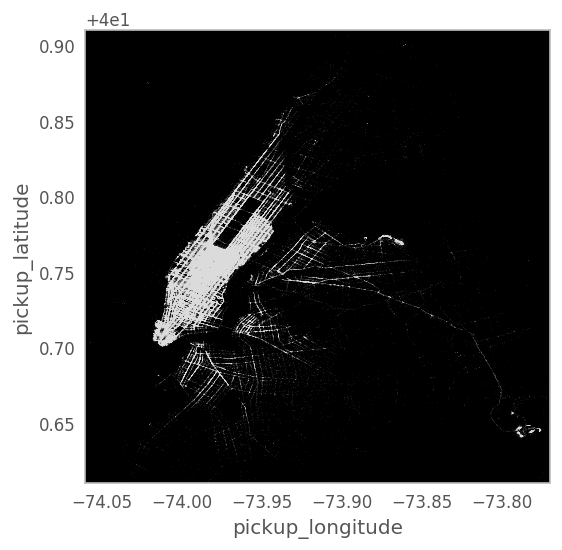

In [25]:
%matplotlib inline 

pd.options.display.mpl_style = 'default'
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)
rcParams['figure.figsize'] = (5, 5)
rcParams['figure.dpi'] = 120

P=data_clean.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',color='white', xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
P.set_axis_bgcolor('black')

/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


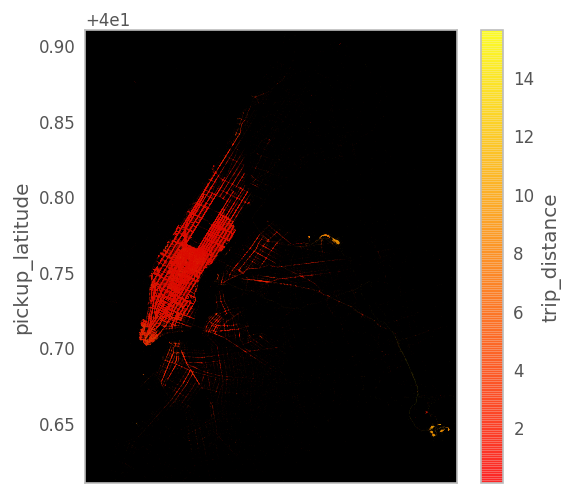

In [27]:
%matplotlib inline 

pd.options.display.mpl_style = 'default'
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)
rcParams['figure.figsize'] = (5, 5)
rcParams['figure.dpi'] = 120

P=data_clean.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',c='trip_distance', cmap='autumn', xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
P.set_axis_bgcolor('black')

/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


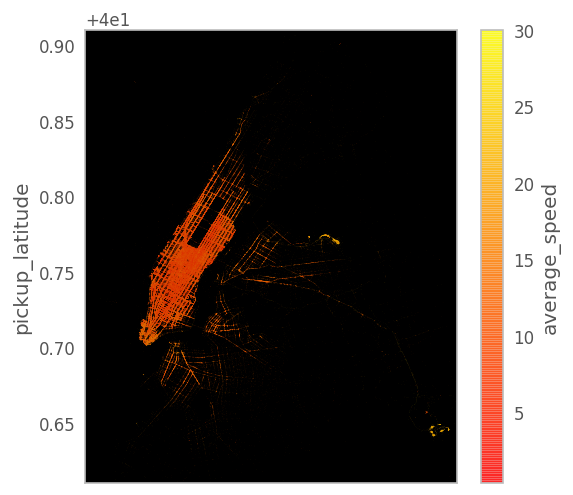

In [24]:
%matplotlib inline 

pd.options.display.mpl_style = 'default'
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)
rcParams['figure.figsize'] = (5, 5)
rcParams['figure.dpi'] = 120

P=data_clean.loc[(data_clean['average_speed'] > 0) & (data_clean['average_speed'] <= 30.0)].plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',c='average_speed', cmap='autumn', xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
P.set_axis_bgcolor('black')

/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/ipykernel/__main__.py:10: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/home/cristian/anaconda3/envs/datank_challenge/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


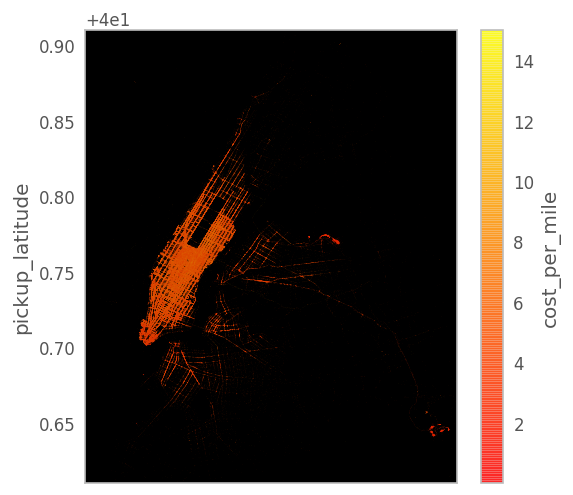

In [26]:
%matplotlib inline 

pd.options.display.mpl_style = 'default'
new_style = {'grid': False}
matplotlib.rc('axes', **new_style)
rcParams['figure.figsize'] = (5, 5)
rcParams['figure.dpi'] = 120

P=data_clean.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',c='cost_per_mile', cmap='autumn', xlim=(-74.06,-73.77),ylim=(40.61, 40.91),s=.02,alpha=.6)
P.set_axis_bgcolor('black')

### Prediccion de XXX

In [3]:
# Paquetes para pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Paquetes para hacer encoding de variables
from sklearn_pandas import DataFrameMapper

# Paquetes para curva ROC y precision_recall
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# Paquete para AUC
from sklearn.metrics import roc_auc_score

In [4]:
X = data_clean.drop('trip_distance', axis=1)
y = datos_clean['trip_distance']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=120652, test_size=0.3)

NameError: name 'data_clean' is not defined